<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

...have you completed? 
....have all questions in each assignment been addressed in your project? ... (ONLY AFTER COMPLETE) have you gone above and beyond on the notebook?:

1.   [ ] Module One: Define ML Problems
2.   [ ] Module Two: Wrangle ML Datasets
3.   [ ] Module Three: Permulation & Boosting
4.   [ ] Module Four: Model Interpretation

#**About this Dataset**

**Context**
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

**Content**
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

***All personally identifying information has been removed from the data.***

**Acknowledgements**
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

**Inspiration**
This data set is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models!

If you're looking for inspiration on data visualizations, check out the #TidyTuesday program, a free, weekly online event that encourages participants to create and share their code and visualizations for a given data set on Twitter.

If you'd like to dive into predictive modeling, Julia Silge has an accessible and fantastic walk-through which highlights the tidymodels R package.

back-up data set: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv

**if all else fails in the galaxy...**

#Predicting Cancelations

Objective: Explore hotel bookings data to forecast when people are actually willing to spend time on vacation.

#**Table of content:**
**Problem Type:** Regression (May log transform target into a Classification Problem)
1. Data Preprocessing
```
    Importing Dataset
    32-Feature Anaylsis (Or features valuable to project)
    Descriptive Statistical Analysis
    Descriptive Statistical Visualisation Analysis
    Visualisation Each Attribute Using Seaborn
```
2. Feature Engineering
```
    Imputation or Data Cleaning
    Label Encoder
    OneHotEncoder
    Handling Outliers
    Converting Imbalance Dataset to Balanced Dataset
    Binning
    Log Transformation
    Feature Scaling
    Feature Split
```
3. Feature Selection
```
    Univariate Selection
    Feature Importance
    Correlation Matrix With HeatMap
    Principal Component Analysis (PCA)
    Discrimenent Component Analysis (DCA)
    Any other learned objective to best serve the model
```
4. Model Selection
```
    Model Selection Using Spot Check and Compare Algorithms Without Feature Scaling
    Model Selection Using Spot Check and Compare Algorithms With Feature Scaling
    Regularization Hyper Parameter Tunning For ___________________
    Ensemble Algorithms ( possible Bagging and Boosting Algorithms)
    Regularization Hyper Parameter Tunning For _________________
    Regularization Hyper Parameter Tunning For _________________
    Regularization Hyper Parameter Tunning For _________________
    Regularization Hyper Parameter Tunning For _________________
    Algorithm For __________________________
```
5. Conclusion
```
    Report Findings.
```

<img src="https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295">

#1. Data Preprocessing

###Import Data

In [1]:
# About this file
# This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.

In [1]:
import warnings
warnings.simplefilter('ignore')

!pip install category_encoders==2.*
!pip install chart_studio

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 


In [4]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


###Import Classes

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import numpy as np
import pandas as pd
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import cufflinks as cf
cf.go_offline()

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import plotly.express as px
#from category_encoder import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_predict


#Please Organize classes!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [6]:
# Import Data Set

pd.options.display.max_columns = None
dataset = pd.read_csv("hotel_bookings.csv")
hotels = dataset.copy() #Acting as 'df'

In [45]:
# Variable Check (dataset and hotels)

**Column Description**
1.   Hotel (H1 = Resort Hotel or H2 = City Hotel)

2.   is_canceled
Value indicating if the booking was canceled (1) or not (0)

3.   lead time 
Number of days that elapsed between the entering date of the booking into the PMS and the arrival datev

4.   arrival_date_year
Year of arrival date

5.   arrival_date_month
Month of arrival date

6.   arrival_date_week_number
Week number of year for arrival date

7.   arrival_date_day_of_month
Day of arrival date

8.   stays_in_weekend_nights
Number of weekend nights (Saturday or Sunday) the guest stayed or booke

9.   stays_in_week_nights
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10.   adults
Number of adults

11.   children
Number of children

12.   babies
Number of babies

13.   meal
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal

14.   country
Country of origin. Categories are represented in the ISO 3155–3:2013 format

15.   market_segment
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16.   distribution_channel
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.   is_repeated_guest
sort
Value indicating if the booking name was from a repeated guest (1) or not (0)

18.   previous_cancellations
Number of previous bookings that were cancelled by the customer prior to the current booking

19.   previous_bookings_not_canceled
sort
Number of previous bookings not cancelled by the customer prior to the current booking
20.   reserved_room_type
sort
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21.   assigned_room_type
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due

22.   booking_changes
sort
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS

23.   deposit_type
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No

24.   agent
ID of the travel agency that made the booking

25.   company
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for

26.   days_in_waiting_list
Number of days the booking was in the waiting list before it was confirmed to the customer

27.   customer_type
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of

28.   adr
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29.   required_car_parking_spaces
Number of car parking spaces required by the customer

30.   total_of_special_requests
Number of special requests made by the customer (e.g. twin bed or high floor)

31.   reservation_status
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Ou

32. reservation_status_date
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to


In [ ]:
#print(dataset.shape)
#dataset
print(hotels.shape)
hotels

In [7]:
print('Data is imported under the copied dataframe called "hotels".') 
print('Dataframe contains 119,390 rows and 32 columns.')
print('From a quick, there are various data types, dates, and NaN values that will need to be addressed.')

Data is imported under the copied dataframe called "hotels".
Dataframe contains 119,390 rows and 32 columns.
From a quick, there are various data types, dates, and NaN values that will need to be addressed.


In [48]:
# pct of cells with missing values out of all cells
total_cells = np.product(hotels.shape)
total_missing_values = hotels.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 3.4%


In [7]:
# Null Values in dataset in order of amount present. 
hotels.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
# Total percent of null values present in column.
# Asks question: Of what percent are missing values in each column?
null_percentage = hotels.isnull().sum() / len(hotels) * 100
null_percentage.sort_values(ascending=False)

In [51]:
hotels.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
#Why is children a float?
hotels['children'].unique().tolist()

[0.0, 1.0, 2.0, 10.0, 3.0, nan]

In [53]:
# How many null values exist?
hotels['children'].isnull().sum()

4

In [54]:
# How many null values exist?
hotels['country'].isnull().sum()

488

In [55]:
#Why is agent a float?
hotels['agent'].nunique()

333

In [56]:
# How many null values exist?
hotels['company'].isnull().sum()

112593

In [57]:
# How many unique values?
hotels['company'].nunique()

352

In [58]:
# How many unique values?
hotels['adr'].nunique()

8879

In [59]:
# Explore from Top to bottom.

print('The column "hotels" is a dataframe with 119,390 rows (guest check-ins) and a total of 32 columns (features)')
print('Missing values are in columns "children", "country", "agent", and "company".')
print('Percentage of cells with null-values: 3.4%')
print('The columns arrival_date_year, arrival_date_month, arrival_date_day_of_month \nneed to have one column created, "arrival_date", to be used as the index column.')
print('The column"children" contains the object float (see cell above) with 5 unique values and 4 null values. \nThis will need to bee addressed.')
print('The column "country" contains 488 null values. Further analysis required.')
print('The column "agent" is a float with 333 unique values.')
print('The column "company" contains 112,593 null values and 352 uniques values. Further anaylsis required. Potential to drop column.')
print('The predictor column is an object data type.')
print('There are a quite few categorical variables that will need to be either labeled or encoded.')
print('See _____________________________ section in Table of Contents for more anaylsis on columns missing values.')

The column "hotels" is a dataframe with 119,390 rows (guest check-ins) and a total of 32 columns (features)
Missing values are in columns "children", "country", "agent", and "company".
Percentage of cells with null-values: 3.4%
The columns arrival_date_year, arrival_date_month, arrival_date_day_of_month 
need to have one column created, "arrival_date", to be used as the index column.
The column"children" contains the object float (see cell above) with 5 unique values and 4 null values. 
This will need to bee addressed.
The column "country" contains 488 null values. Further analysis required.
The column "agent" is a float with 333 unique values.
The column "company" contains 112,593 null values and 352 uniques values. Further anaylsis required. Potential to drop column.
The predictor column is an object data type.
There are a quite few categorical variables that will need to be either labeled or encoded.
See _____________________________ section in Table of Contents for more anaylsis on

##Choose Your Target
Which column in your tabular dataset will you predict?

In [60]:
# Target, or predictor, is the column "reservation_status_date"

In [ ]:
# convert the wod months into int months to convert the year, month and date using the datetime function.

In [22]:
##hotels['arrival_date'] = hotels['arrival_date_year'] + hotels['arrival_date_month'] + hotels['arrival_date_day_of_month']

0            2015July1
1            2015July1
2            2015July1
3            2015July1
4            2015July1
              ...     
119385    2017August30
119386    2017August31
119387    2017August31
119388    2017August31
119389    2017August29
Length: 119390, dtype: object

In [ ]:
# Change target

In [61]:
target = 'reservation_status_date'
y = hotels['reservation_status_date']

In [62]:
# How many missing values in the target?
hotels['reservation_status_date'].isnull().sum()

0

In [63]:
# How many unique values in the target?
hotels['reservation_status_date'].nunique()

926

In [64]:
# What is the data type of the target?
print(type(hotels['reservation_status_date']))
print(hotels['reservation_status_date'].dtype)

<class 'pandas.core.series.Series'>
object


In [65]:
print('The target, or predictor, is the target "reservation_status_date.')
print('The target contains 119,390 rows, 0 null values, 926 unique values.')
print('Additionally, the target is a series type and object data type and \nhas not been converted to datetime format.')

The target, or predictor, is the target "reservation_status_date.
The target contains 119,390 rows, 0 null values, 926 unique values.
Additionally, the target is a series type and object data type and 
has not been converted to datetime format.


In [66]:
# How is the target distributed?
hotels[target].value_counts()

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2014-11-18       1
2015-04-07       1
2015-02-09       1
2015-03-30       1
2015-03-18       1
Name: reservation_status_date, Length: 926, dtype: int64

In [67]:
print('The target contains 926 unique values.')

The target contains 926 unique values.


Take some time to convert the column to datetime format.

Graph the distibution of the target ONLY.

In [68]:
#sns.distplot(hotels.reservation_status_date, hist=False, rug=True, bins=50)

###How is your target distributed?
In other words, is your problem regression/classification?


*   Classification: how many classes? imbalanced of balanced?
*   Regression: Is the target right-skewed? If so, youn may wanna log transform the target.



In [70]:
hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out


In [71]:
# What questions should you be asking yourself (in place of the stakeholder) from the 1st glance???????????

###Read in Data Set

###Descriptive Statistical Anaylsis

In [73]:
hotels.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Visuals

In [ ]:
hotels.hist(layout=(5,5),bins=25,figsize=(25,25),sharex=False,sharey=False,grid=True)
plt.show();

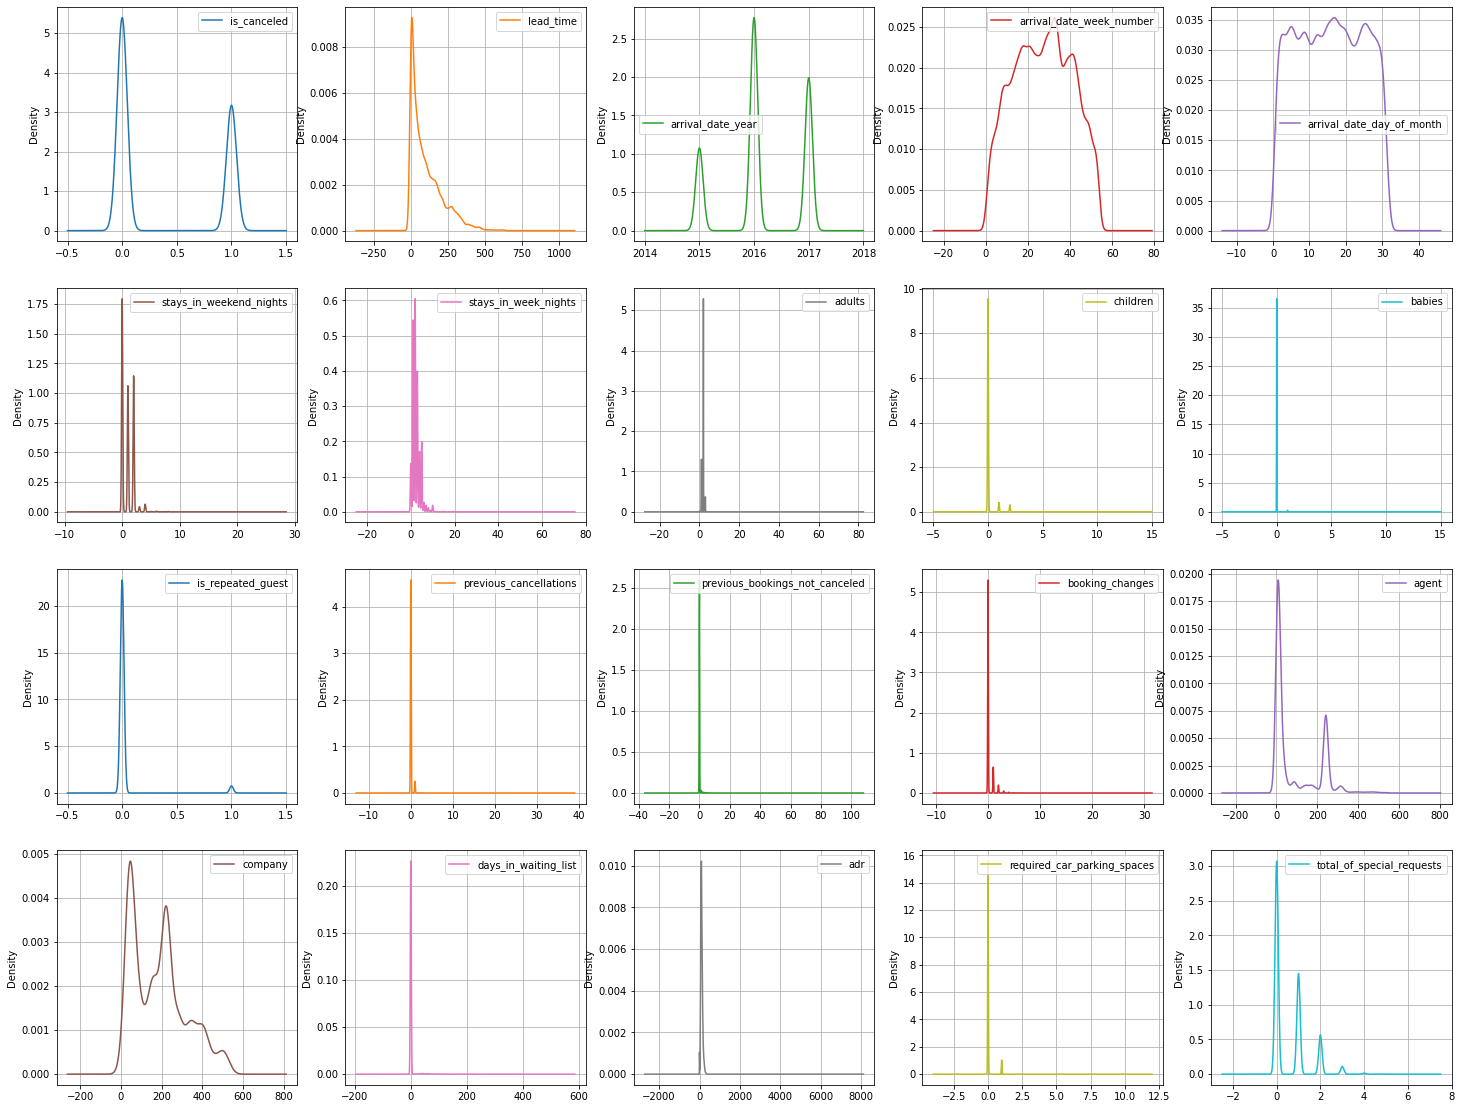

In [77]:
hotels.plot(kind='density',subplots=True,layout=(5,5),figsize=(25,25),grid=True,use_index=False,sharex=False,sharey=False);

In [ ]:
# Hotel

sb.distplot(hotels['company'],bins=5,hist=True,norm_hist=True,vertical=False,label='Hotel')
plt.legend();


#Change or Delete. DO NOT LEAVE HERE. #############

###Non-numeric features

https://statisticsbyjim.com/basics/histograms/

In [8]:
hotels.describe(exclude='number').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [41]:
hotels['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
g = sns.catplot(x='hotel', col='customer_type', kind='count', data=hotels);
g.fig.set_figwidth(10)
g.fig.set_figheight(10)

#2. Feature Engineering

Feature Engineering vs Feature Selection: https://innovation.alteryx.com/feature-engineering-vs-feature-selection/

    Feature engineering is the process of using domain knowledge to extract new variables from raw data that make machine learning algorithms work.

In [ ]:
hotels['total_guests'] = hotels['adults'] + hotels['children'] + hotels['babies']

hotels['total_nights_stay'] = hotels['stays_in_week_nights'] + hotels['stays_in_weekend_nights']



hotels.rename(columns = {'arrival_date_month': 'month'}, inplace = True)
hotels.rename(columns = {'arrival_date_year': 'year'}, inplace = True)
hotels.rename(columns = {'adr_pp': 'price_per_person'}, inplace = True)
hotels.rename(columns = {'arrival_date_week_number': 'week_of_month'}, inplace = True)
hotels.rename(columns = {'arrival_date_day_of_month': 'day'}, inplace = True)
hotels.rename(columns = {'required_car_parking_spaces': 'parking_space'}, inplace = True)


hotels = dm_hoteles.drop(['children',
                          'adults',
                          'babies',
                          'arrival_date_day_of_month',
                          'arrival_date_year',
                          'arrival_date_week_number',
                          'arrival_date_month',],axis=1)

hotels = hotels.drop(hotels[hotels['total_guests']==0].index,axis=0)
hotels.columns

hotels = hotels.drop(['stays_in_week_nights',
                              'stays_in_weekend_nights'],axis=1)




#3. Feature Selection

    For any given dataset, many possible features can be chosen. A crucial point to consider is which features to use. There are an infinite number of transformations possible. Enter feature selection.

#4. Model Selection



Sample Model

    # Build our pipeline
    model = Pipeline([
                  ('imputer', SimpleImputer()),
                  ('classifier', RandomForestClassifier())
    ])

    # Train our model
    model.fit(X_train, y_train)

    # Check our metrics
    print('Training Accuracy Score', model.score(X_train, y_train))
    print('Validation Accuracy Score', model.score(X_val, y_val))

    print(classification_report(y_val, model.predict(X_val)))

In [69]:

# Target and Feature Variables
target = 'reservation_status_date'
features= hotels.drop(columns=target, axis=1, inplace=True)
#y = hotels.pop(['reservation_status_date'], axis=1)

# Split train into train & val. Make val the same size as test.
#X = hotels.drop(columns=['reservation_status_date'],axis=1, inplace=True)
#train, test = train_test_split(X,y, train_size=0.80, test_size=0.20,  
#                              stratify=hotels['reservation_status_date'], random_state=42)

# Arrange data into X features matrix and y target vector
#X_train = hotels.drop(columns=['reservation_status_date'])
#y_train = train['reservation_status_date']
#X_val = val.drop(columns=['reservation_status_date'])
#y_val = val['reservation_status_date']
#X_test = test
#y_test = test

#Be Sure to include test train and validate set in this cell!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!





#Figure out why you aren't able to split the dataset into train and test!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Avoid leakage of information from test to train or from target to features

#5. Conclusion

Report your findings